In [1]:
import pandas as pd
from pymongo import MongoClient as mc
import seaborn as sns

In [2]:
myClient = mc("mongodb://localhost:27017")
myDb = myClient['db_test']
myCol = myDb['checkout']
myQuery = myCol.aggregate([
    { "$match": { "target": "vergani" } },
    {
        "$group": { 
            "_id" : 1,
            "GuestTrue": {"$sum": {"$cond": [{"$eq":["$guest", True]}, 1, 0]}},
            "GuestFalse": {"$sum": {"$cond": [{"$eq":["$guest", False]}, 1, 0]}}
                }
    },
    {"$project": {"_id":0}}
])

dataToPerform = pd.DataFrame(myQuery).T.rename({0:"Total"},axis=1)
dataToPerform


,Total
GuestTrue,258
GuestFalse,108


In [3]:
#normalizing data 
data = pd.json_normalize(list(myCol.find()))
data = data.query("target=='vergani'")

dataTrue = data[data['guest'] == True]['guest'].reset_index().drop('index',axis=1).count()
dataFalse = data[data['guest'] == False]['guest'].reset_index().drop('index',axis=1).count()
dataToPerform = pd.DataFrame({"GuestTrue":dataTrue,"GuestFalse":dataFalse}).T.rename({'guest':"Total"},axis=1)
dataToPerform

,Total
GuestTrue,258
GuestFalse,108


<AxesSubplot:ylabel='Total'>

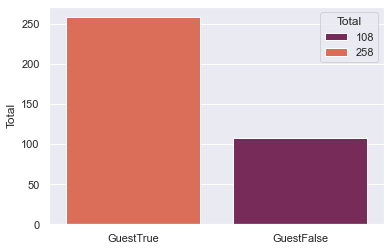

In [4]:
sns.set()
sns.barplot(x=dataToPerform.index, y='Total',data=dataToPerform, hue='Total',palette="rocket",dodge=False)